In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve, GridSearchCV, StratifiedKFold, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Functions </h2>

In [26]:
def cm(y_pred, y_test, model=str, tuned=False, smote=False):
    """
    Creates the confusion matrix for the model and outputs the evaluation metrics

    Inputs:
    1. y_pred   :      Model predictions from test set
    2. y_test   :      Test set
    3.title     :      Name of the model -- Logistic Regression, SVM, Decision Tree
    4.tuned     :      Set to yes if the model was tuned. Default False
    5.smote     :      Set to yes if smote was applied to the data. Default False 
    """
    cm = confusion_matrix(y_test, y_pred)

    # Annotations for squares
    group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
    group_counts = [f'{value}' for value in cm.flatten()]
    labels = [f'{name}\n{count}' for name, count in zip(group_names, group_counts)]
    labels = np.array(labels).reshape(2, 2)

    # Plot
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
   #plt.title(f"Confusion Matrix for {model}")
    if tuned==False and smote==False:
        plt.title(f"Confusion Matrix for {model}")
    elif tuned==True and smote==False:
        plt.title(f"Confusion Matrix for {model} (Tuned)")
    elif tuned==False and smote==True:
        plt.title(f"Confusion Matrix for {model} (Smote)")
    elif tuned==True and smote==True:
        plt.title(f"Confusion Matrix for {model} (Smote/Tuned)")
    plt.xticks(ticks=[0.5, 1.5], labels=['No (0)', 'Yes (1)'])
    plt.yticks(ticks=[0.5, 1.5], labels=['No (0)', 'Yes (1)'], rotation=0)
    plt.show()

    #Evaluate the model
    print("\n--- Model Evaluation ---")
    accuracyScore = accuracy_score(y_test, y_pred)
    precisionScore = precision_score(y_test, y_pred)
    recallScore = recall_score(y_test, y_pred)
    f1Score = f1_score(y_test, y_pred)

    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('Precision Score: ', precision_score(y_test, y_pred))
    print('Recall Score: ', recall_score(y_test, y_pred))
    print('F1 Score: ', f1_score(y_test, y_pred))

    tn = cm[0,0]
    fp = cm[0,1]
    specificity = tn/(tn+fp)
    print('Specificity: ', specificity)
    scores = [accuracyScore, precisionScore, recallScore, f1Score, specificity]

    return classification_report(y_test, y_pred)

def cm_Only(y_pred, y_test, model=str, tuned=False, smote=False):
    """
    Outputs the confusion matrix
    """
    cm = confusion_matrix(y_test, y_pred)

    # Annotations for squares
    group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
    group_counts = [f'{value}' for value in cm.flatten()]
    labels = [f'{name}\n{count}' for name, count in zip(group_names, group_counts)]
    labels = np.array(labels).reshape(2, 2)

    # Plot
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
   #plt.title(f"Confusion Matrix for {model}")
    if tuned==False and smote==False:
        plt.title(f"Confusion Matrix for {model}")
    elif tuned==True and smote==False:
        plt.title(f"Confusion Matrix for {model} (Tuned)")
    elif tuned==False and smote==True:
        plt.title(f"Confusion Matrix for {model} (Smote)")
    elif tuned==True and smote==True:
        plt.title(f"Confusion Matrix for {model} (Smote/Tuned)")
    plt.xticks(ticks=[0.5, 1.5], labels=['No (0)', 'Yes (1)'])
    plt.yticks(ticks=[0.5, 1.5], labels=['No (0)', 'Yes (1)'], rotation=0)
    #plt.show()

    return cm

def cm_Scores(y_pred, y_test, cm):
    """
    Creates a dataframe with all of the scores calculated from the confusion matrix
    """
    accuracyScore = accuracy_score(y_test, y_pred)
    precisionScore = precision_score(y_test, y_pred)
    recallScore = recall_score(y_test, y_pred)
    f1Score = f1_score(y_test, y_pred)

    tn = cm[0,0]
    fp = cm[0,1]
    specificity = tn/(tn+fp)

    scores = {
        'Accuracy Score': accuracyScore,
        'Precision Score': precisionScore,
        'Recall Score': recallScore,
        'F1 Score': f1Score,
        'Specificity': specificity
    }

    scores_df = pd.DataFrame([scores])
    return scores_df

def decisionTree(model, X_train, tuned=False, smote=False):
    """
    Creates the decision tree visual
    1. model    :   Decision Tree model
    2. X_train  :   X train set
    3.tuned     :   Set to yes if the model was tuned. Default False
    4.smote     :   Set to yes if smote was applied to the data. Default False
    """
    plt.figure(figsize=(25, 12))  
    plot_tree(model,
            filled=True,
            rounded=True,
            feature_names=X_train.columns,
            class_names=['Rejected', 'Approved'],
            fontsize=12,
            impurity=False,       
            proportion=True)
    if tuned==False and smote==False:
        plt.title("Decision Tree - Loan Approval Prediction", fontsize=12)
    elif tuned==True and smote==False:
        plt.title("Decision Tree (Tuned) - Loan Approval Prediction", fontsize=12)
    elif tuned==False and smote==True:
        plt.title("Decision Tree (Smote) - Loan Approval Prediction", fontsize=12)
    elif tuned==True and smote==True:
        plt.title("Decision Tree (Smote/Tuned) - Loan Approval Prediction", fontsize=12)
    #plt.title("Decision Tree - Loan Approval Prediction", fontsize=12)
    plt.tight_layout()
    plt.show()

    return None

def plot_learning_curve(estimator, title, X, y, axes=None, train_sizes=np.linspace(0.1, 1.0, 5), cv=None, scoring='accuracy'):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.set_title(title)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    axes.grid()
    axes.legend(loc="best")
    return plt

#  --- Hyperparameter Tuning Param Grids ---
# Logistic regression
lr_param_grid = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Decision tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 4, 5]
}

# SVM Model
svm_param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10]
}

In [27]:
# Import change_summary
changelog = pd.read_csv('../Changelogs/change_summary.csv').to_dict(orient='records')

# Change summary initialization and check
change_summary = pd.DataFrame(changelog)
pd.set_option('display.max_colwidth', None)
display(change_summary)  

,column,change,rationale
0,age,Removed 3 row(s) where age > 125,Oldest verified human lived to be 122; values above 125 are likely errors or outliers.
1,loan_status,Dropped loan_status column,Target variable for classification; not needed in cleaned dataset.
2,person_income,"Capped person_income at $3,000,000 and applied log1p transformation",Handled extreme right skew and outliers in income distribution; log1p applied to normalize values and removed person_income for modeling.
3,loan_amnt,Applied log1p transformation to loan_amount,Handled extreme right skew and outliers in loan amount distribution; log1p applied to normalize values.
4,person_emp_exp,Removed 5 row(s) where person_emp_exp > 70,Unrealistic employment experience; values above 70 years are likely errors or outliers.
5,person_education,Combined Master and Doctorate categories into one group -- Graduate,Doctorate had the lowest frequency out of all the categories which could impact analysis
6,person_home_ownership,Combined RENT and OTHER into Non-Homeowner category and MORTGAGE and OWN into Homeowner category,RENT and MORTGAGE had high frequencies while OWN and OTHER had low frequencies which could impact analysis
7,"['person_gender', 'loan_intent', 'previous_loan_defaults_on_file', 'person_education_new', 'person_home_ownership_new']",Applied one-hot encoding (drop_first=True),Converted categorical variables into binary indicators for model compatibility.
8,loan_status,Readded loan_status column,Target variable for classification; readded after cleaning and preprocessing.


In [28]:
# Load cleaned data from CSV
df = pd.read_csv("../Data/cleaned_loan_data.csv")
df.head()

,person_age,person_emp_exp,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,log_income,log_loan_amt,person_gender_male,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes,person_education_new_Bachelor,person_education_new_Graduate,person_education_new_High School,person_home_ownership_new_Non-Homeowner,loan_status
0,22,0,16.02,0.49,3,561,11.183713,10.463132,0,0,0,0,1,0,0,0,1,0,1,1
1,21,0,11.14,0.08,2,504,9.415971,6.908755,0,1,0,0,0,0,1,0,0,1,0,0
2,25,3,12.87,0.44,3,635,9.428592,8.612685,0,0,0,1,0,0,0,0,0,1,0,1
3,23,0,15.23,0.44,2,675,11.286702,10.463132,0,0,0,1,0,0,0,1,0,0,1,1
4,24,1,14.27,0.53,4,586,11.099469,10.463132,1,0,0,1,0,0,0,0,1,0,1,1


<h2> Data Prep </h2>

In [29]:
# Split the data into features and target variable
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [30]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (31494, 19)
X_test: (13498, 19)


In [31]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Check for class imbalance
print(f"Class distribution in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Class distribution in test set:\n{y_test.value_counts(normalize=True)}")

# Changelog addition
changelog.append({
    'column': 'numerical_columns',
    'change': 'Applied MinMaxScaler to training data; transformed test data using same scaler.',
    'rationale': 'Avoided data leakage by fitting scaler only on training data. Ensures proper model generalization and adheres to machine learning best practices.'
})

Class distribution in training set:
loan_status
0    0.777799
1    0.222201
Name: proportion, dtype: float64
Class distribution in test set:
loan_status
0    0.777819
1    0.222181
Name: proportion, dtype: float64


<h3> Apply Smote to handle the imbalance data </h3>

In [32]:
# SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_smote_train, y_smote_train = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after SMOTE
X_smote_test = X_test_scaled
y_smote_test = y_test

# Changelog entry for SMOTE
changelog.append({
    'column': 'loan_status',
    'change': f'Applied SMOTE to the training set only (train shape now: {X_smote_train.shape}); test set remains unchanged ({X_test_scaled.shape}).',
    'rationale': 'SMOTE was applied to the training data only to correct class imbalance without leaking information from the test set, preserving model validity and ensuring generalization.'
})

<h2> Build the Models </h2>

<h3> Model 1: Logistic Regression </h3>

In [33]:
# Logistic Regression -- Base Model
lrBase = LogisticRegression(max_iter=1000)
lrBase.fit(X_train_scaled, y_train)

# Logistic Regression - Smote Model
lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_smote_train, y_smote_train)

LogisticRegression(max_iter=1000)

<h3> Model 2: Decision Tree </h3>

In [ ]:
# Decision Tree -- Base Model
dt_model = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Visualize the Decision Tree
decisionTree(dt_model, X_train)

# Decision Tree -- Smote Model
smote_dt_model = DecisionTreeClassifier(max_depth=5,random_state=42)
smote_dt_model.fit(X_smote_train, y_smote_train)

# Visualize the Decision Tree
decisionTree(smote_dt_model, X_train, smote=True)


<h3> Model 3: SVM </h3>

In [ ]:
# SVM -- Base Model
svmBase = SVC(kernel='rbf', C=10, random_state=42)
svmBase.fit(X_train_scaled, y_train)

# SVM -- Smote Model
svm_smote = SVC(kernel='rbf', C=10, random_state=42)
svm_smote.fit(X_smote_train, y_smote_train)

SVC(C=10, random_state=42)

<h2> Model Evaluation </h2>

<h4> Logistic Regression </h4>

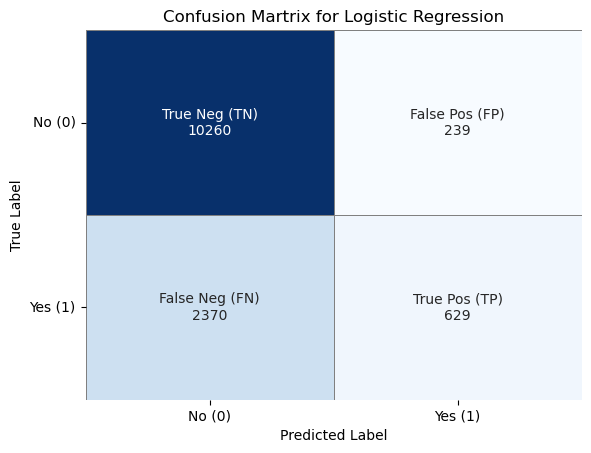


--- Model Evaluation ---
Accuracy Score:  0.8067121054971107
Precision Score:  0.7246543778801844
Recall Score:  0.20973657885961988
F1 Score:  0.3253167830359452
Specificity:  0.9772359272311649
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     10499
           1       0.72      0.21      0.33      2999

    accuracy                           0.81     13498
   macro avg       0.77      0.59      0.61     13498
weighted avg       0.79      0.81      0.76     13498



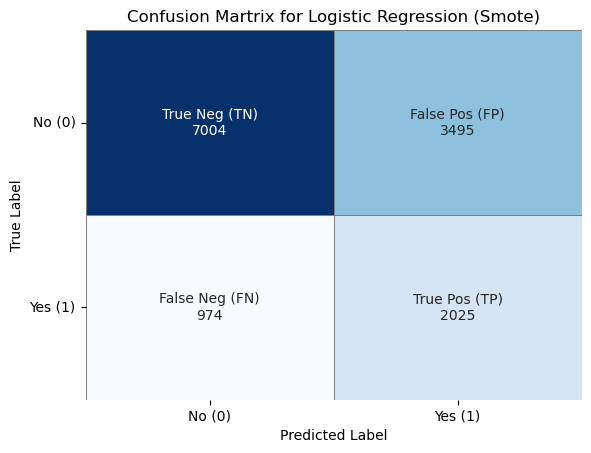


--- Model Evaluation ---
Accuracy Score:  0.6689139131723219
Precision Score:  0.36684782608695654
Recall Score:  0.6752250750250083
F1 Score:  0.47540791172672847
Specificity:  0.6671111534431851
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     10499
           1       0.37      0.68      0.48      2999

    accuracy                           0.67     13498
   macro avg       0.62      0.67      0.62     13498
weighted avg       0.76      0.67      0.70     13498



In [ ]:
# Base Model 
lr_pred = lrBase.predict(X_test_scaled)
print(cm(lr_pred, y_test, 'Logistic Regression'))

# Smote Model
lr_smote_pred = lr_smote.predict(X_test_scaled)
print(cm(lr_smote_pred, y_smote_test, 'Logistic Regression', smote=True))


**Logistic Regression Model Evaluation** - The confusion matrix and evaluation metrics above of the Logistic Regression without SMOTE show the performance to predict loan approval status (approved vs. rejected). The model achieves a relatively high accuracy of 81%, but this is somewhat misleading due to class imbalance — there are far more rejected loans (class 0) than approved loans (class 1) as seen above under class distribution. The specificity is very high at 0.98, meaning the model is excellent at correctly identifying rejected loans. However, the recall for approved loans is only 0.21, indicating the model is missing most of the actual approved cases, which could be a serious issue in a loan approval system where it's important not to overlook eligible applicants. The precision is 0.73, showing that when the model does predict a loan as approved, it's correct about 73% of the time. Overall, the model is heavily biased toward predicting rejections.

To address this issue, in the next iteration of the model we applied SMOTE (Synthetic Minority Over-sampling Technique). SMOTE helps balance the dataset by generating synthetic samples of the minority class (approved loans), giving the model a more representative understanding of both outcomes. This is expected to improve recall, allowing the model to better detect approved loans while maintaining a reasonable trade-off with precision and accuracy.

After applying SMOTE, recall improved significantly to 0.68, indicating better sensitivity to approved applications. However, this came at a cost: accuracy dropped to 0.67, precision fell to 0.37, and specificity decreased to 0.67, signaling that the model began approving more ineligible applicants — which poses financial risk to the financial institutions. Given these trade-offs, while SMOTE improved the model’s ability to detect approved loans, it also increased the risk of false approvals.

<h3> Decision Tree </h3>

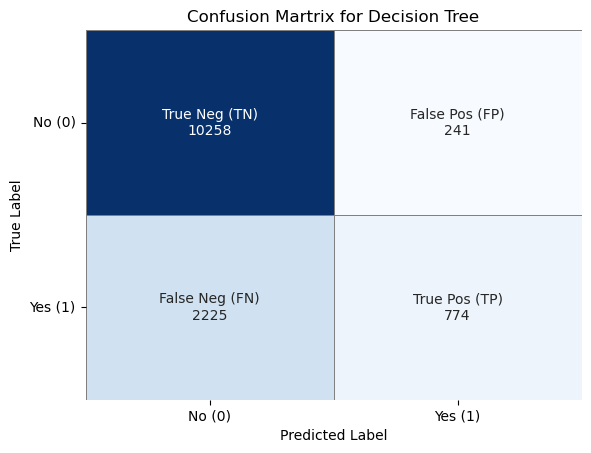


--- Model Evaluation ---
Accuracy Score:  0.8173062675951993
Precision Score:  0.7625615763546798
Recall Score:  0.25808602867622543
F1 Score:  0.38565022421524664
Specificity:  0.9770454328983713
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     10499
           1       0.76      0.26      0.39      2999

    accuracy                           0.82     13498
   macro avg       0.79      0.62      0.64     13498
weighted avg       0.81      0.82      0.78     13498



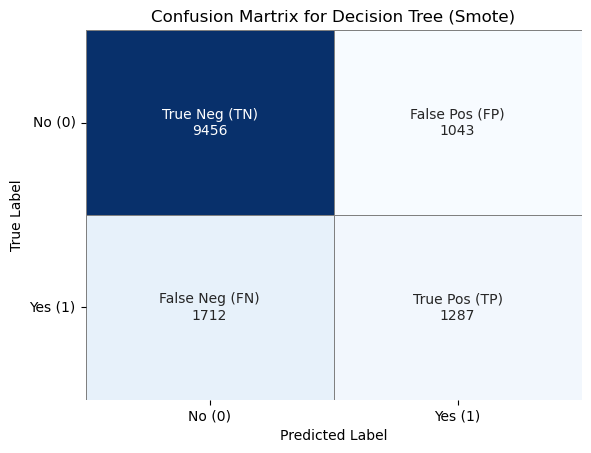


--- Model Evaluation ---
Accuracy Score:  0.7958956882501111
Precision Score:  0.5523605150214592
Recall Score:  0.42914304768256084
F1 Score:  0.48301745167948956
Specificity:  0.9006572054481379
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     10499
           1       0.55      0.43      0.48      2999

    accuracy                           0.80     13498
   macro avg       0.70      0.66      0.68     13498
weighted avg       0.78      0.80      0.79     13498



In [ ]:
#Base Model
dt_predictions = dt_model.predict(X_test_scaled)
print(cm(dt_predictions, y_test, 'Decision Tree'))

#Smote Model
smote_dt_predictions = smote_dt_model.predict(X_smote_test)
print(cm(smote_dt_predictions, y_smote_test, 'Decision Tree', smote=True))

**Decision Tree Model Evaluation** - The Decision Tree model without SMOTE demonstrates strong performance in predicting the "Rejected" class, with a precision of 0.82 and an exceptionally high recall of 0.97, leading to a solid f1-score of 0.89. This indicates that the model is very good at correctly identifying rejected loan applications. However, its performance on the "Approved" class is much weaker, with a precision of 0.74 but a low recall of 0.27 and an f1-score of only 0.39. This shows that the model struggles to correctly identify approved loans, often misclassifying them as rejections. Although the overall accuracy is 82%, it is heavily biased toward the majority "Rejected" class. The macro averages, particularly a recall of 0.62 and an f1-score of 0.64, highlight this imbalance, suggesting the model is not equally effective for both classes.

Similar to the Logistic Regression Model, to overcome the imbalance and improve model's performance, SMOTE was applied to the response variable. The Decision Tree model trained after applying SMOTE shows a significant improvement in identifying Approved loan applications, increasing recall from 0.27 to 0.54 — meaning the model now correctly captures more than half of the actual approvals. The f1-score for the Approved class also improved from 0.39 to 0.49, indicating a more balanced trade-off between precision and recall. However, this gain comes at the cost of overall accuracy, which dropped from 82% to 74%, and a lower recall for the Rejected class (0.97 → 0.80), meaning the model now misclassifies more rejections as approvals.

<h3> SVM </h3>

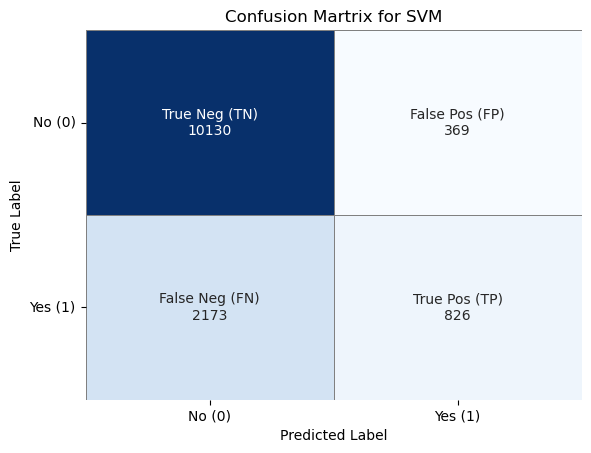


--- Model Evaluation ---
Accuracy Score:  0.8116758038227886
Precision Score:  0.6912133891213389
Recall Score:  0.27542514171390464
F1 Score:  0.3938960419647115
Specificity:  0.964853795599581
              precision    recall  f1-score   support

           0       0.82      0.96      0.89     10499
           1       0.69      0.28      0.39      2999

    accuracy                           0.81     13498
   macro avg       0.76      0.62      0.64     13498
weighted avg       0.79      0.81      0.78     13498



In [ ]:
# Base Model
svm_pred = svmBase.predict(X_test_scaled)
print(cm(svm_pred, y_test, 'SVM'))

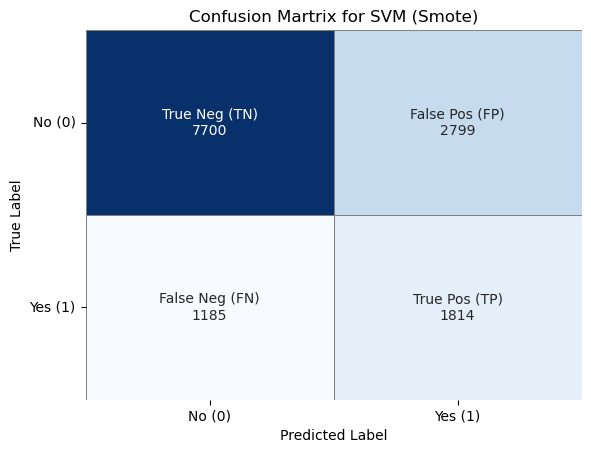


--- Model Evaluation ---
Accuracy Score:  0.7048451622462587
Precision Score:  0.39323650552785605
Recall Score:  0.60486828942981
F1 Score:  0.4766158696794535
Specificity:  0.7334031812553576
              precision    recall  f1-score   support

           0       0.87      0.73      0.79     10499
           1       0.39      0.60      0.48      2999

    accuracy                           0.70     13498
   macro avg       0.63      0.67      0.64     13498
weighted avg       0.76      0.70      0.72     13498



In [ ]:
# Smote Model
svm_pred_smote = svm_smote.predict(X_smote_test)
print(cm(svm_pred_smote, y_smote_test, 'SVM', smote=True))

**SVM Model Evaluation** - Without SMOTE, the model achieves a high accuracy of 81.17% and strong performance on the majority class (class 0), with a precision of 0.82, recall of 0.96, and an F1-score of 0.89. However, it struggles significantly with the minority class (class 1), achieving only a 0.28 recall and an F1-score of 0.39, indicating poor sensitivity and potential bias toward the majority class. After applying SMOTE, the model becomes more balanced in its performance across both classes. While overall accuracy drops to 70.48%, the recall for the minority class improves to 0.6%, and the F1-score rises to 0.48. This improvement comes at the cost of a lower specificity (73.34% vs. 96.49%) and reduced precision for class 1 (from 0.69 to 0.39), reflecting more false positives. In summary, SMOTE enhances the model’s ability to identify the minority class at the expense of overall accuracy and precision similar to the previous 2 models. 

<h2> Hyper Parameter Tuning </h2>

To further improve the performance of our models, we applied hyperparameter tuning to ensure that our models are not limited by default settings, which is not be suitable for the imbalance in our response variable in our dataset. By finding the optimal parameters, tuning can lead to improvements in key performance metrics like accuracy, recall, precision, and F1-score. This is especially important for our dataset, where a well-tuned model can better identify minority class instances without sacrificing too much overall performance. Moreover, tuning helps the model generalize better to unseen data, reducing the risks of overfitting or underfitting. 

<h3> Logistic Regression </h3>


Logistic Regression Best Parameters: {'C': 2.782559402207126, 'penalty': 'l1', 'solver': 'liblinear'}


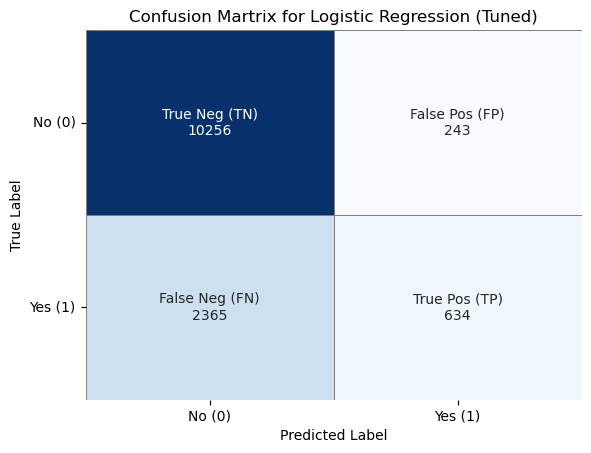


--- Model Evaluation ---
Accuracy Score:  0.8067861905467477
Precision Score:  0.7229190421892816
Recall Score:  0.21140380126708902
F1 Score:  0.32714138286893707
Specificity:  0.9768549385655777
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     10499
           1       0.72      0.21      0.33      2999

    accuracy                           0.81     13498
   macro avg       0.77      0.59      0.61     13498
weighted avg       0.79      0.81      0.76     13498


Logistic Regression (Smote) Best Parameters: {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


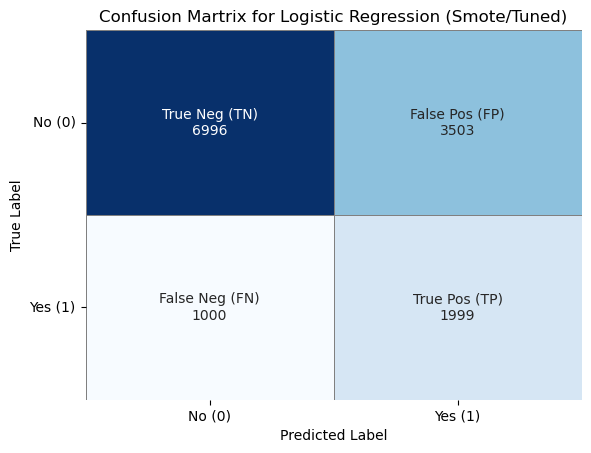


--- Model Evaluation ---
Accuracy Score:  0.6663950214846643
Precision Score:  0.3633224282079244
Recall Score:  0.6665555185061687
F1 Score:  0.4702976120456417
Specificity:  0.6663491761120107
              precision    recall  f1-score   support

           0       0.87      0.67      0.76     10499
           1       0.36      0.67      0.47      2999

    accuracy                           0.67     13498
   macro avg       0.62      0.67      0.61     13498
weighted avg       0.76      0.67      0.69     13498



In [ ]:
# ---- Logistic Regression - Tuning ----
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42),
                               param_grid=lr_param_grid, cv=5, scoring='f1', n_jobs=-1)
lr_grid_search.fit(X_train_scaled, y_train)

print("\nLogistic Regression Best Parameters:", lr_grid_search.best_params_)
lr_best_model = lr_grid_search.best_estimator_

#Generate the predictions
lr_tuned_predictions = lr_best_model.predict(X_test_scaled)

#Evaluate the model
print(cm(lr_tuned_predictions, y_test, 'Logistic Regression', tuned=True))

# ---- Logistic Regression - Tuning with SMOTE ----
lr_grid_search_smote = GridSearchCV(LogisticRegression(random_state=42),
                               param_grid=lr_param_grid, cv=5, scoring='f1', n_jobs=-1)
lr_grid_search_smote.fit(X_smote_train, y_smote_train)

print("\nLogistic Regression (Smote) Best Parameters:", lr_grid_search_smote.best_params_)
lr_best_model_smote = lr_grid_search_smote.best_estimator_

#Generate the predictions
lr_tuned_predictions_smote = lr_best_model_smote.predict(X_smote_test)

#Evaluate the model
print(cm(lr_tuned_predictions_smote, y_test, 'Logistic Regression', tuned=True, smote=True))

The tuned Logistic Regression model achieved an overall accuracy of 81%, performing very well at identifying rejected loans (98% recall) but struggling with approved ones, capturing only 21% of them. While the precision for approved loans is relatively decent at 72%, the low recall suggests many approved cases are being misclassified as rejected. This leads to a lower F1-score of 0.33 for the approved class. The macro average recall is 0.59, highlighting the imbalance in performance between classes. 

On the other hand, the tuned Logistic Regression model, trained with SMOTE, achieves an overall accuracy of approximately 66.6%. While it performs the best in terms of recall for the minority class (Approved loans) at 66.7%, its precision for approvals is relatively low at 36.3%, indicating that many predicted approvals are incorrect. The model correctly identifies rejected loans 66.6% of the time (specificity) but struggles with a high number of false positives. The F1-score for the approved class is moderate at 0.47, reflecting the imbalance between precision and recall. Overall, while the model is effective and doing the best at capturing most approvals amongst all the previous models, it sacrifices precision, leading to a higher risk of incorrectly approving ineligible applications. 

<h3> Decision Tree </h3>


Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}


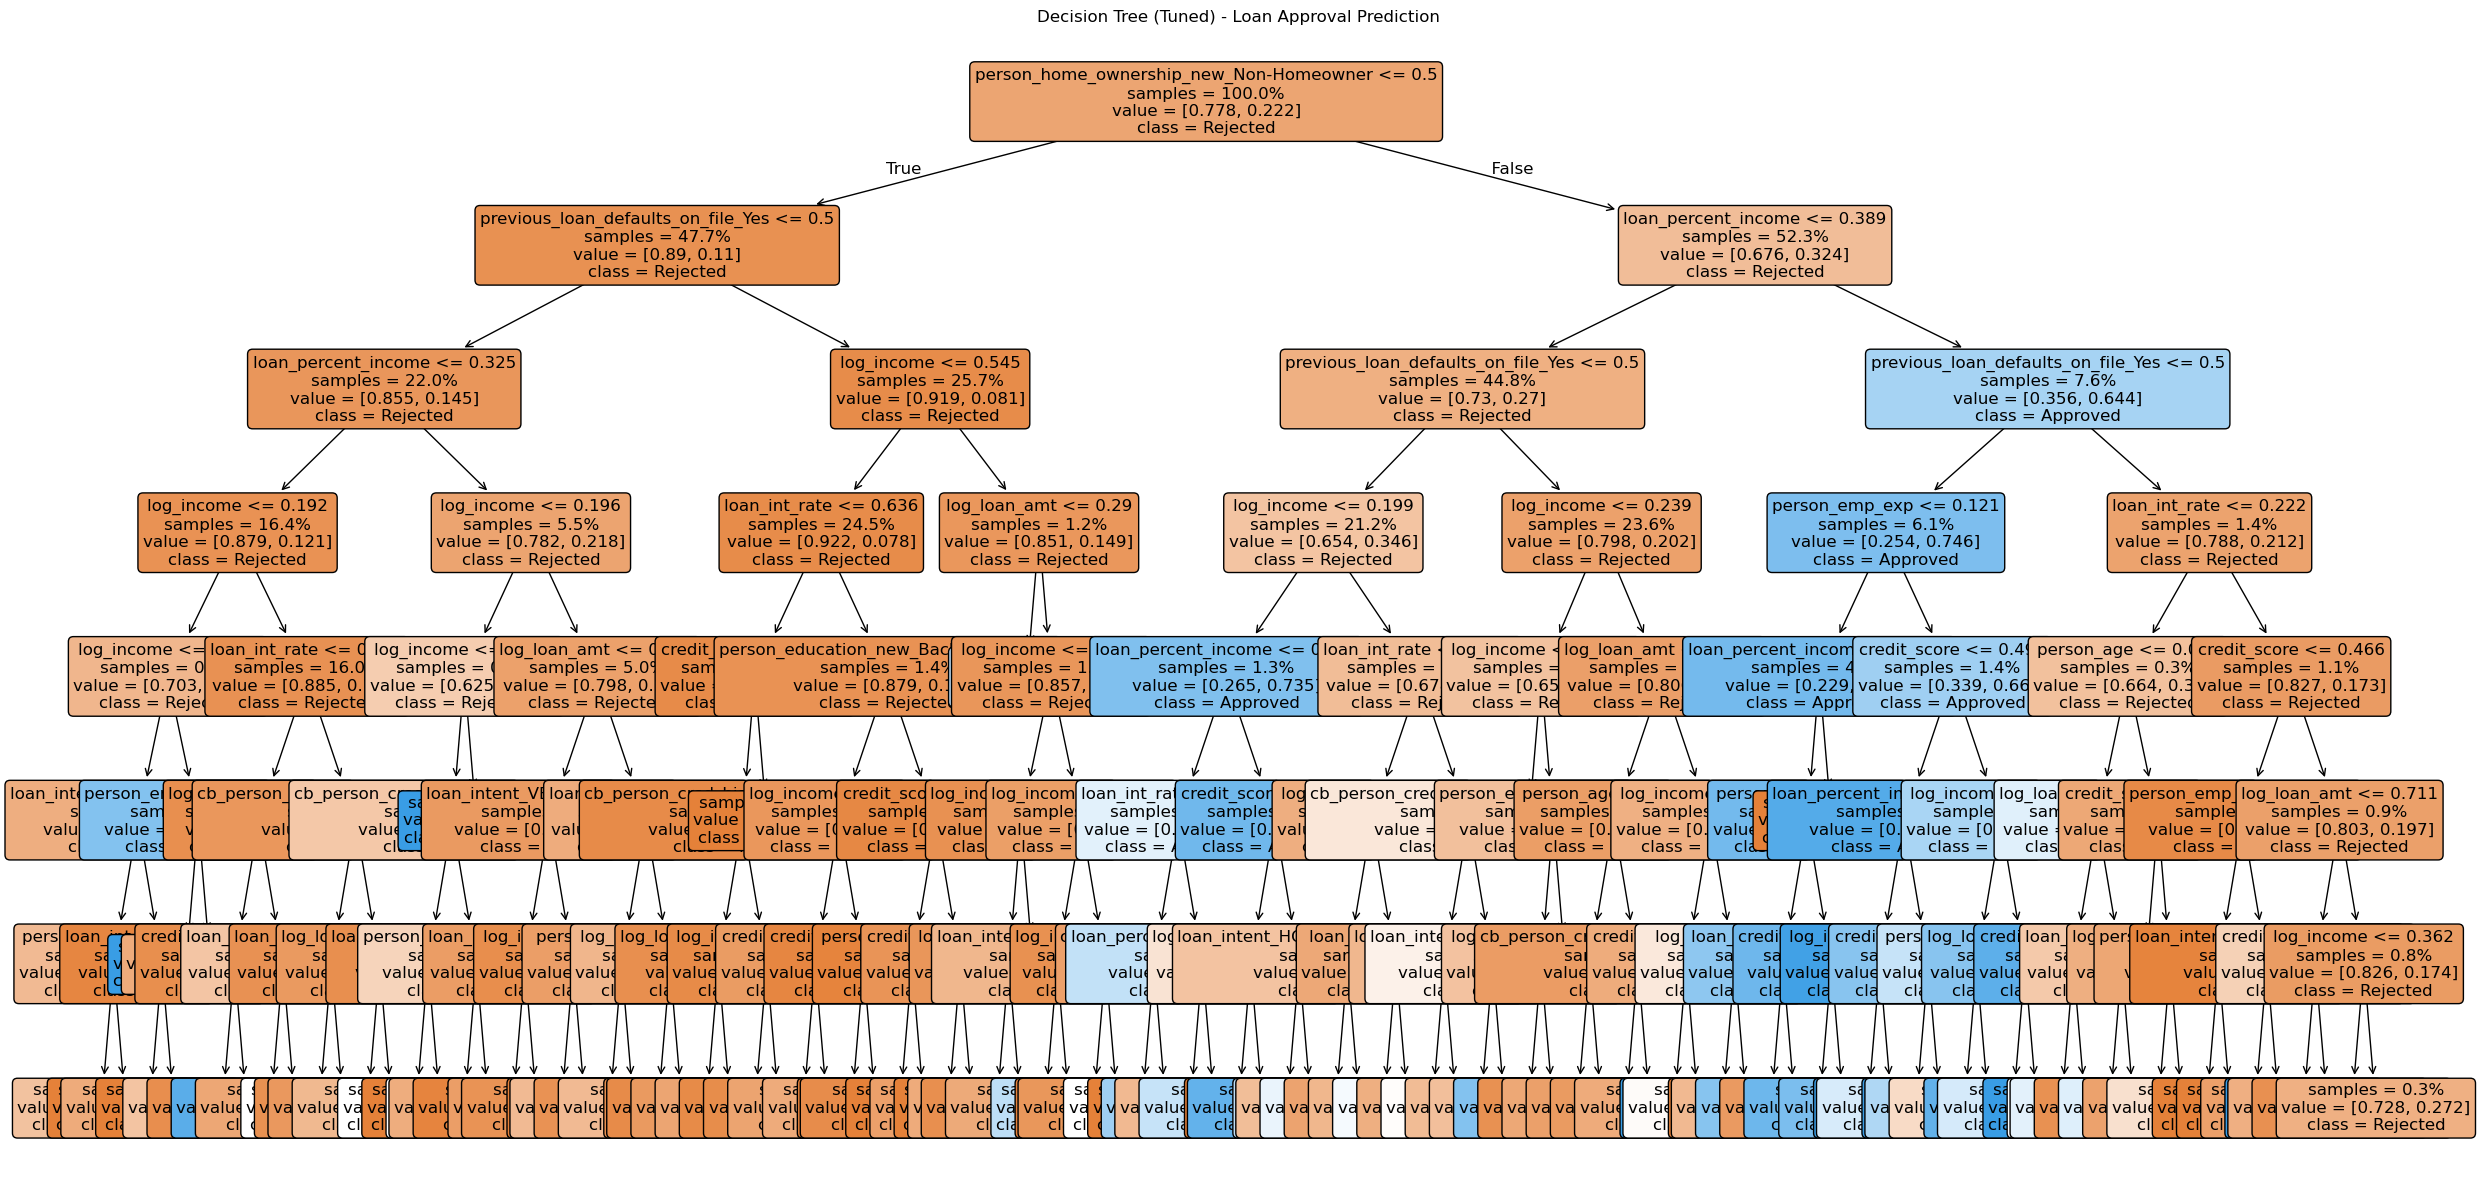

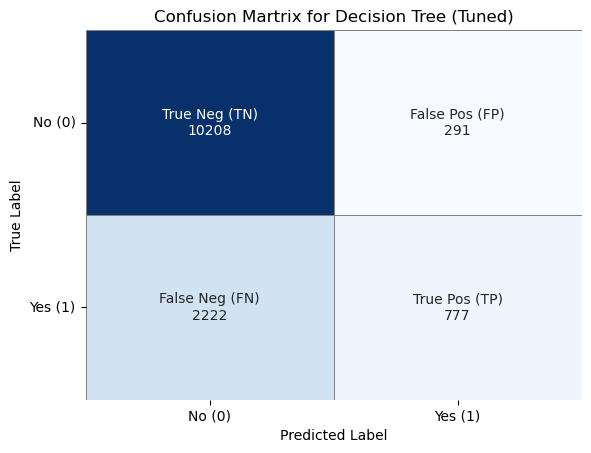


--- Model Evaluation ---
Accuracy Score:  0.8138242702622611
Precision Score:  0.7275280898876404
Recall Score:  0.2590863621207069
F1 Score:  0.38209982788296043
Specificity:  0.9722830745785312
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     10499
           1       0.73      0.26      0.38      2999

    accuracy                           0.81     13498
   macro avg       0.77      0.62      0.64     13498
weighted avg       0.80      0.81      0.78     13498


Decision Tree(Smote) Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}


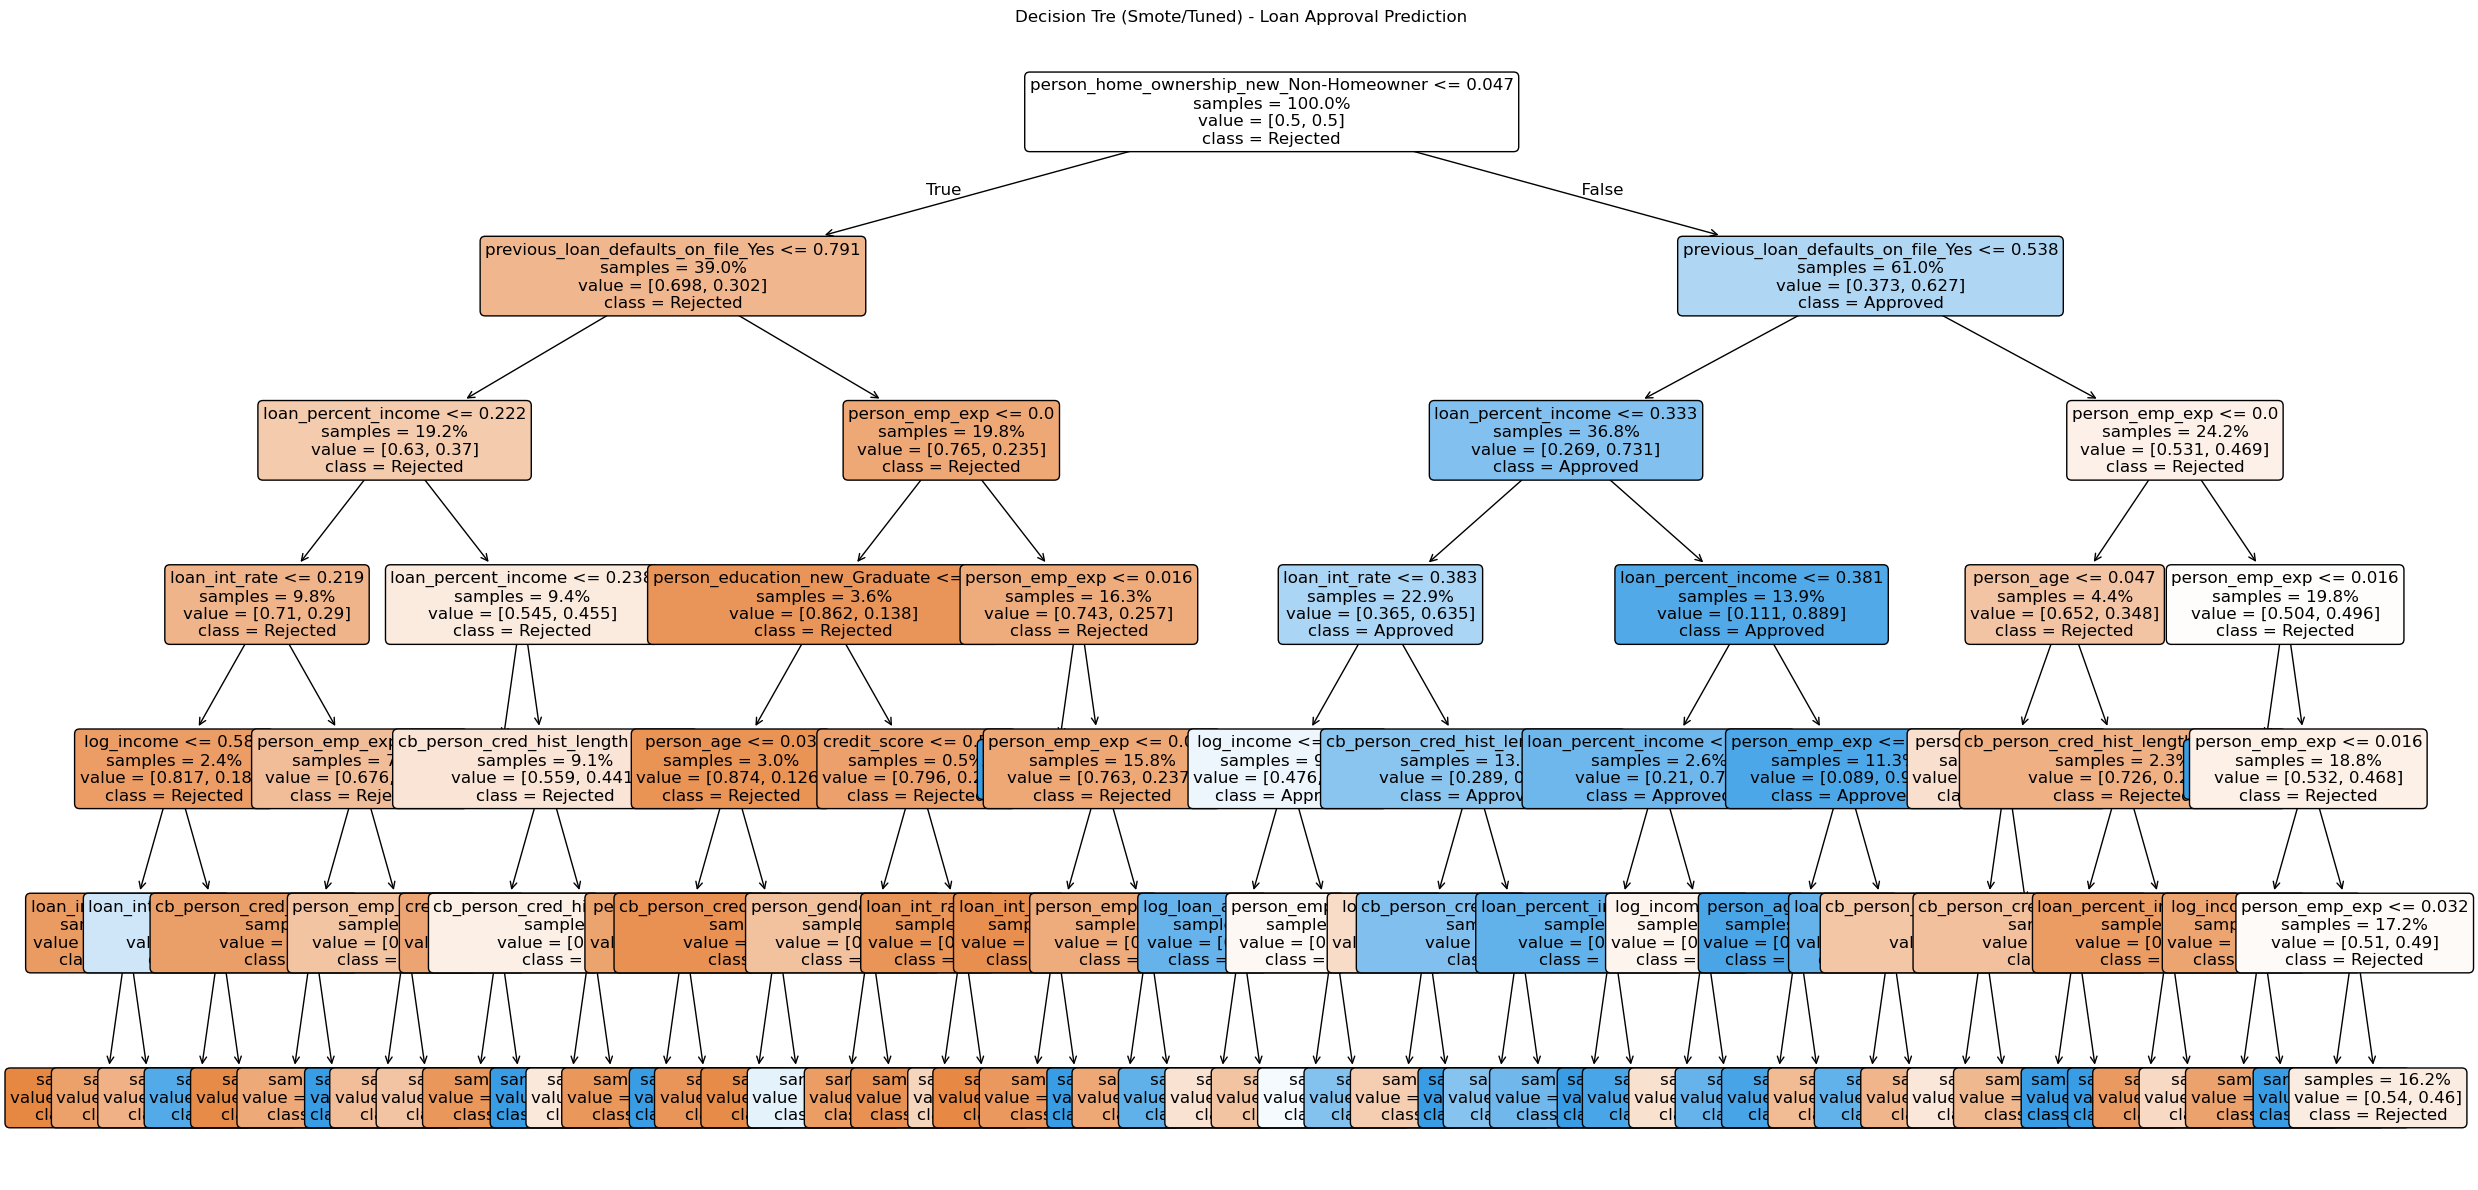

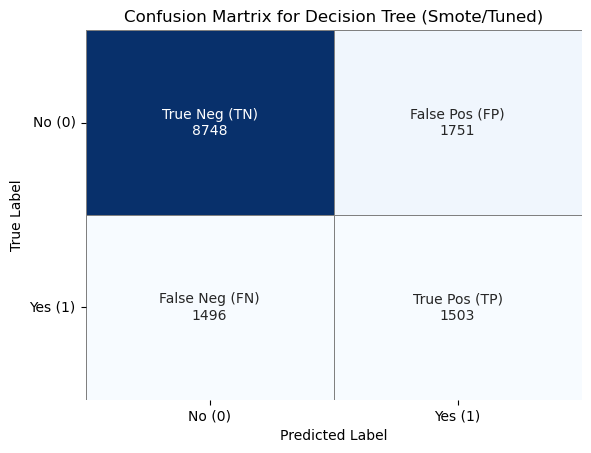


--- Model Evaluation ---
Accuracy Score:  0.7594458438287154
Precision Score:  0.46189305470190534
Recall Score:  0.5011670556852285
F1 Score:  0.4807292499600192
Specificity:  0.8332222116392037
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     10499
           1       0.46      0.50      0.48      2999

    accuracy                           0.76     13498
   macro avg       0.66      0.67      0.66     13498
weighted avg       0.77      0.76      0.76     13498



In [ ]:
# ---- Decision Tree - Tuning ----
dt_grid_search = GridSearchCV(DecisionTreeClassifier(max_depth=5,random_state=42),
                               param_grid=dt_param_grid, cv=5, scoring='f1', n_jobs=-1)
dt_grid_search.fit(X_train_scaled, y_train)
print("\nDecision Tree Best Parameters:", dt_grid_search.best_params_)

dt_best_model = dt_grid_search.best_estimator_

# Visualize the Decision Tree
decisionTree(dt_best_model, X_train, tuned=True)

# Generate the predictions 
dt_pred_tuned = dt_best_model.predict(X_test_scaled)

#Evaluate the model
print(cm(dt_pred_tuned, y_test, 'Decision Tree', tuned=True))

# --- Decision Tree - Tuning with SMOTE ---
dt_grid_search_smote = GridSearchCV(DecisionTreeClassifier(max_depth=5,random_state=42),
                               param_grid=dt_param_grid, cv=5, scoring='f1', n_jobs=-1)
dt_grid_search_smote.fit(X_smote_train, y_smote_train)
print("\nDecision Tree(Smote) Best Parameters:", dt_grid_search_smote.best_params_)

dt_best_model_smote = dt_grid_search_smote.best_estimator_

# Visualize the Decision Tree
decisionTree(dt_best_model_smote, X_train, tuned=True, smote=True)

# Generate the predictions
dt_pred_smote = dt_best_model_smote.predict(X_smote_test)

# Evaluate the model
print(cm(dt_pred_smote, y_smote_test, 'Decision Tree', tuned=True, smote=True))

The tuned Decision Tree model indicate strong performance on the majority class but continued struggles with the minority class. For the "Rejected" class (class 0), the model achieves high precision (0.83), recall (0.96), and F1-score (0.89), showing that it accurately and consistently identifies rejected cases. However, the model performs poorly on the "Approved" class (class 1), with a lower precision of 0.67 and a recall of just 0.31, leading to an F1-score of 0.43. This means the model misses a large portion of actual approved cases. While the overall accuracy is relatively high at 81%, and the weighted F1-score is 0.79, these are influenced heavily by the imbalanced dataset where rejected cases dominate. The macro-average F1-score, which gives equal weight to both classes, is only 0.66, highlighting the imbalance in performance. Compared to the results of the Decision Tree Model (SMOTE) without tuning, this model with tuning has a lower recall.

The SMOTE Tuned Decision Tree model shows a moderate improvement in balancing the performance between the two classes compared to both the untuned and non-SMOTE versions. For the majority class (Rejected), the model maintains strong performance with a precision of 0.84, recall of 0.87, and F1-score of 0.85. For the minority class (Approved), the precision improves to 0.48, and recall reaches 0.42, with an F1-score of 0.45 — higher than the original tuned model (F1 = 0.43) and slightly below the SMOTE-only model (F1 = 0.49). Overall accuracy is 77%, which is a middle ground between the higher accuracy of the tuned non-SMOTE model (81%) and the lower accuracy of the SMOTE-only version (74%). The macro average F1-score of 0.65 and the weighted average F1 of 0.76 reflect a more balanced performance across both classes. This suggests that applying both SMOTE and hyperparameter tuning helps reduce class imbalance effects, offering a better trade-off between precision and recall for the minority class, while preserving respectable accuracy and majority class performance.

<h3> SVM </h3>


 SVM Best Parameters: {'C': 10, 'kernel': 'rbf'}


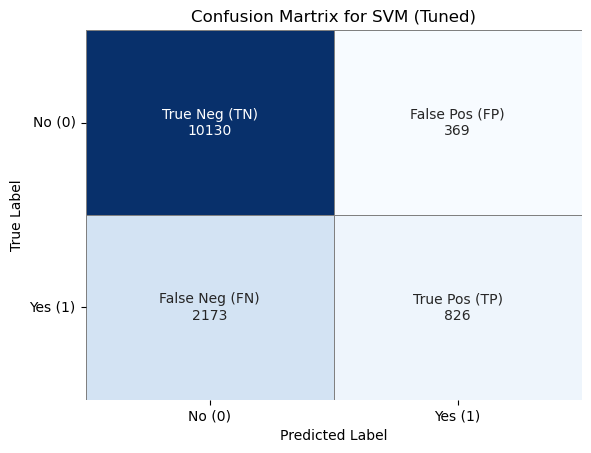


--- Model Evaluation ---
Accuracy Score:  0.8116758038227886
Precision Score:  0.6912133891213389
Recall Score:  0.27542514171390464
F1 Score:  0.3938960419647115
Specificity:  0.964853795599581
              precision    recall  f1-score   support

           0       0.82      0.96      0.89     10499
           1       0.69      0.28      0.39      2999

    accuracy                           0.81     13498
   macro avg       0.76      0.62      0.64     13498
weighted avg       0.79      0.81      0.78     13498


 SVM (Smote) Best Parameters: {'C': 10, 'kernel': 'rbf'}


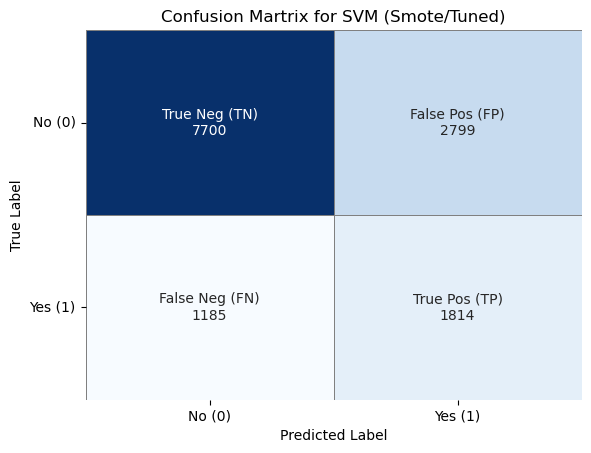


--- Model Evaluation ---
Accuracy Score:  0.7048451622462587
Precision Score:  0.39323650552785605
Recall Score:  0.60486828942981
F1 Score:  0.4766158696794535
Specificity:  0.7334031812553576
              precision    recall  f1-score   support

           0       0.87      0.73      0.79     10499
           1       0.39      0.60      0.48      2999

    accuracy                           0.70     13498
   macro avg       0.63      0.67      0.64     13498
weighted avg       0.76      0.70      0.72     13498



In [ ]:
# ---- SVM - Tuning ----
svm_grid_search =  GridSearchCV(SVC(random_state=42),
                               param_grid=svm_param_grid, cv=5, scoring='f1', n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)

# Print out the best parameters
print("\n SVM Best Parameters:", svm_grid_search.best_params_)
svm_best_model = svm_grid_search.best_estimator_

# Generate the predictions
svm_tuned_pred = svm_best_model.predict(X_test_scaled)

# Evaluate the model
print(cm(svm_tuned_pred, y_test, 'SVM', tuned=True))

# ---- SVM - Tuning with smote ----
# Create GridSearchCV
svm_grid_search_smote =  GridSearchCV(SVC(random_state=42),
                               param_grid=svm_param_grid, cv=5, scoring='f1', n_jobs=-1)
svm_grid_search_smote.fit(X_smote_train, y_smote_train)

#Print out the best parameters
print("\n SVM (Smote) Best Parameters:", svm_grid_search_smote.best_params_)

svm_best_model_smote = svm_grid_search_smote.best_estimator_

# Generate the predictions
svm_tuned_smote_pred = svm_best_model_smote.predict(X_smote_test)

#Evaluate the model
print(cm(svm_tuned_smote_pred, y_smote_test, 'SVM', tuned=True, smote=True))

After hyperparameter tuning, the SVM model without SMOTE maintains a high accuracy of 81.17% and excellent performance on the majority class (class 0), with a recall of 96% and F1-score of 0.89. However, its recall for the minority class (class 1) remains low at 0.28, indicating that despite tuning, the model still struggles to correctly identify positive instances. On the other hand, when SMOTE is applied to the tuned model, the recall for class 1 significantly improves to 0.6, and the F1-score increases to 0.48, highlighting a more balanced model performance. This improvement comes at the cost of reduced accuracy (70.48%) and specificity (73.34%), due to a higher rate of false positives. Overall, tuning combined with SMOTE helps the model become more sensitive to the minority class but increases the chances of false positives.

Additionally, based on our hyperparameter tuning, we can see that our original base and smote models were using the best parameters, so we will continue to use those models for SVM.

<h2> Cross-Validation </h2>

<h3> Logistic Regression </h3>

In [ ]:
# Cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(lrBase,
                               X_train_scaled, y_train, cv=5, scoring='f1')

# Cross-validation for Logistic Regression with smote
lr_cv_scores_smote = cross_val_score(lr_smote,
                                     X_smote_train, y_smote_train, cv=5, scoring='f1')

#Cross-validation for tuned Logistic Regression
lr_cv_best_model_scores = cross_val_score(lr_best_model,
                                          X_train_scaled, y_train, cv=5, scoring='f1')

#Cross-validation for tuned Logistic Regression with smote
lr_cv_best_model_scores_smote = cross_val_score(lr_best_model_smote,
                                                X_smote_train, y_smote_train, cv=5, scoring='f1')

print("Logistic Regression Cross-Validation Comparison:")
print(f"{'Dataset':<20}{'Mean CV F1 Score':<20}")
print(f"{'Original':<20}{lr_cv_scores.mean():<20.4f}")
print(f"{'SMOTE':<20}{lr_cv_scores_smote.mean():<20.4f}")
print(f"{'Tuned':<20}{lr_cv_best_model_scores.mean():<20.4f}")
print(f"{'Tuned + SMOTE':<20}{lr_cv_best_model_scores_smote.mean():<20.4f}")

Logistic Regression Cross-Validation Comparison:
Dataset             Mean CV F1 Score    
Original            0.3246              
SMOTE               0.6690              
Tuned               0.3259              
Tuned + SMOTE       0.6718              


<h3> Decision Tree </h3>

In [ ]:
# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model,
                                X_train_scaled, y_train, cv=5, scoring='f1')

#Cross-validation for Decision Tree with smote
dt_cv_smote_scores = cross_val_score(smote_dt_model,
                                X_smote_train, y_smote_train, cv=5, scoring='f1')

#Cross-validation for tuned Decision Tree
dt_cv_best_model_scores = cross_val_score(dt_best_model,
                                X_train_scaled, y_train, cv=5, scoring='f1')

# Cross-validation for tuned Decision Tree with smote
dt_cv_smote_best_model_scores = cross_val_score(dt_best_model_smote,
                                X_smote_train, y_smote_train, cv=5, scoring='f1')

print("Decision Tree Cross-Validation Comparison:")
print(f"{'Dataset':<20}{'Mean CV F1 Score':<20}")
print(f"{'Original':<20}{dt_cv_scores.mean():<20.4f}")
print(f"{'SMOTE':<20}{dt_cv_smote_scores.mean():<20.4f}")
print(f"{'Tuned':<20}{dt_cv_best_model_scores.mean():<20.4f}")
print(f"{'Tuned + SMOTE':<20}{dt_cv_smote_best_model_scores.mean():<20.4f}")



Decision Tree Cross-Validation Comparison:
Dataset             Mean CV F1 Score    
Original            0.3669              
SMOTE               0.6376              
Tuned               0.4199              
Tuned + SMOTE       0.6727              


<h3> SVM </h3>

In [ ]:
#Cross-validation for SVM
svm_cv_scores = cross_val_score(svmBase,
                                X_train_scaled, y_train, cv=5, scoring='f1')

#Cross-validation for SVM with smote
svm_cv_scores_smote = cross_val_score(svm_smote,
                                X_smote_train, y_smote_train, cv=5, scoring='f1')
"""
#Cross-validation for tuned SVM
svm_cv_best_model_scores = cross_val_score(svm_best_model,
                                X_train_scaled, y_train, cv=5, scoring='f1')

#Cross-validation for SVM with smote
svm_cv_best_model_smote_scores = cross_val_score(svm_best_model_smote,
                                X_smote_train, y_smote_train, cv=5, scoring='f1')
"""

print("SVM Cross-Validation Comparison:")
print(f"{'Dataset':<20}{'Mean CV F1 Score':<20}")
print(f"{'Original/Tuned':<20}{svm_cv_scores.mean():<20.4f}")
print(f"{'SMOTE/Tuned':<20}{svm_cv_scores_smote.mean():<20.4f}")
#print(f"{'Tuned':<20}{svm_cv_best_model_scores.mean():<20.4f}")
#print(f"{'Tuned + SMOTE':<20}{svm_cv_best_model_smote_scores.mean():<20.4f}")

SVM Cross-Validation Comparison:
Dataset             Mean CV F1 Score    
Origina/Tuned       0.3858              
SMOTE/Tuned         0.6916              


Based on the cross-validation results, it is clear that the best-performing models across all three algorithms—Logistic Regression, Decision Tree, and SVM—are those that have been both balanced using SMOTE and fine-tuned through hyperparameter optimization. These models consistently achieve the highest mean cross-validated F1 scores, with Logistic Regression reaching 0.6718, Decision Tree at 0.6727, and SVM at 0.6916. This indicates that the combination of SMOTE and tuning significantly enhances the models’ ability to correctly classify the minority class, leading to a more balanced and effective performance. Given these findings, we will now proceed to compare the tuned and SMOTE-applied models in more detail to determine the overall best-performing model.

<h2> Model Comparison </h2>

--- Logistic Regression ---


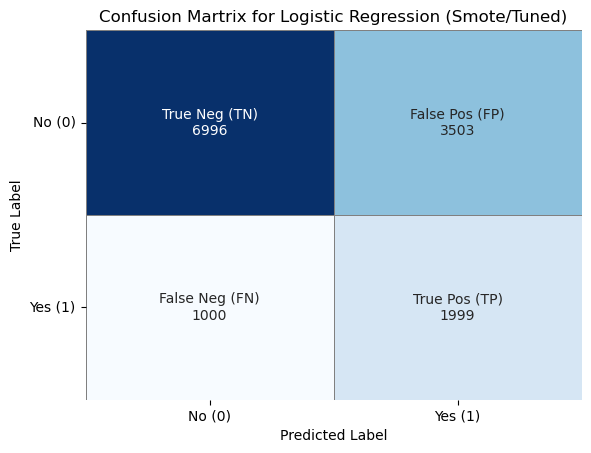


--- Model Evaluation ---
Accuracy Score:  0.6663950214846643
Precision Score:  0.3633224282079244
Recall Score:  0.6665555185061687
F1 Score:  0.4702976120456417
Specificity:  0.6663491761120107
              precision    recall  f1-score   support

           0       0.87      0.67      0.76     10499
           1       0.36      0.67      0.47      2999

    accuracy                           0.67     13498
   macro avg       0.62      0.67      0.61     13498
weighted avg       0.76      0.67      0.69     13498

--- Decision Tree ---


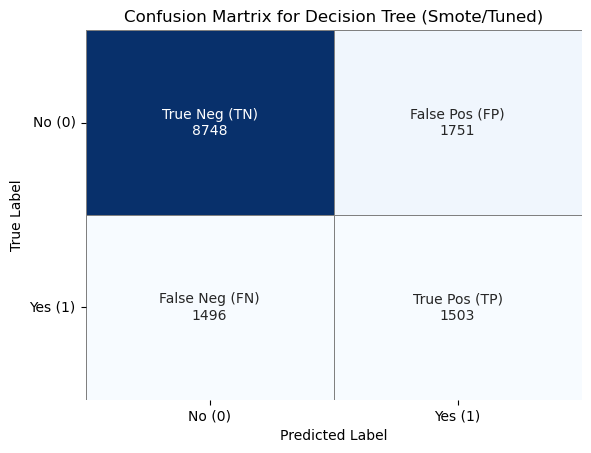


--- Model Evaluation ---
Accuracy Score:  0.7594458438287154
Precision Score:  0.46189305470190534
Recall Score:  0.5011670556852285
F1 Score:  0.4807292499600192
Specificity:  0.8332222116392037
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     10499
           1       0.46      0.50      0.48      2999

    accuracy                           0.76     13498
   macro avg       0.66      0.67      0.66     13498
weighted avg       0.77      0.76      0.76     13498

--- SVM ---


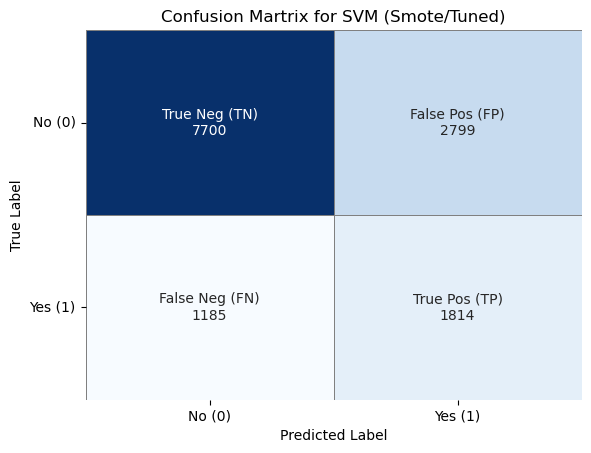


--- Model Evaluation ---
Accuracy Score:  0.7048451622462587
Precision Score:  0.39323650552785605
Recall Score:  0.60486828942981
F1 Score:  0.4766158696794535
Specificity:  0.7334031812553576
              precision    recall  f1-score   support

           0       0.87      0.73      0.79     10499
           1       0.39      0.60      0.48      2999

    accuracy                           0.70     13498
   macro avg       0.63      0.67      0.64     13498
weighted avg       0.76      0.70      0.72     13498



In [ ]:
# --- Confusion Matrices ---
# Plot confusion matrices for the three models

# Logistic Regression 
print("--- Logistic Regression ---")
print(cm(lr_tuned_predictions_smote, y_test, 'Logistic Regression', tuned=True, smote=True))

# Decision Tree
print("--- Decision Tree ---")
print(cm(dt_pred_smote, y_smote_test, 'Decision Tree', tuned=True, smote=True))

# SVM
print("--- SVM ---")
print(cm(svm_pred_smote, y_smote_test, 'SVM', tuned=True, smote=True))


In [ ]:
# Logistic Regression
lr_scores = cm_Scores(lr_tuned_predictions_smote, y_smote_test, confusion_matrix(lr_tuned_predictions_smote, y_smote_test))

# Decision Tree
dt_scores = cm_Scores(dt_pred_smote, y_smote_test, confusion_matrix(dt_pred_smote, y_smote_test))


# SVM
svm_scores = cm_Scores(svm_pred_smote, y_smote_test, confusion_matrix(svm_pred_smote, y_smote_test))

#Combine all of the scores into one
scores_compare = pd.concat([lr_scores, dt_scores, svm_scores])

new_index = ['Logistic Regression', 'Decision Tree', 'SVM']
scores_compare.index = new_index

print(scores_compare)

                     Accuracy Score  Precision Score  Recall Score  F1 Score  \
Logistic Regression        0.666395         0.363322      0.666556  0.470298   
Decision Tree              0.759446         0.461893      0.501167  0.480729   
SVM                        0.704845         0.393237      0.604868  0.476616   

                     Specficity  
Logistic Regression    0.874937  
Decision Tree          0.853963  
SVM                    0.866629  


In [ ]:
# --- Learning Curve ---
print("\n--- Learning Curve ---")
# Plot learning curves for different models
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
# Logistic Regression
plot_learning_curve(lr_best_model_smote,
                    "Logistic Regression (Tuned/Smote)",  
                    X_smote_train, y_smote_train, axes=axes[0], cv=5)

# Decision Tree
plot_learning_curve(dt_best_model_smote,
                    "Decision Tree (Tuned/Smote)", 
                    X_smote_train, y_smote_train, axes=axes[1], cv=5)

# SVM
plot_learning_curve(svm_smote,
                    "SVM (Tuned/Smote)", 
                    X_smote_train, y_smote_train, axes=axes[2], cv=5)
plt.tight_layout()
plt.show()

<h2> Conclusion </h2>

Based on the evaluation metrics of the tuned models with SMOTE, the Decision Tree model demonstrates the best overall performance among the three. It achieves the highest accuracy (75.94%), the highest precision (46.19%), and the highest F1 score (0.4807), indicating a strong balance between precision and recall. Additionally, it has the highest specificity (83.32%), meaning it performs well in correctly identifying negative cases.

While the Logistic Regression model shows the highest recall at 0.66, which reflects its ability to detect the minority class, it does so at the cost of lower precision, accuracy, and specificity. The SVM model performs moderately across all metrics, with a recall of 0.6% and an F1 score of 0.4766, but it falls short of the Decision Tree in terms of overall balance.

However, the learning curves of both the Decision Tree and Logistic Regression models exhibit a noticeable gap between training and cross-validation scores, especially with smaller training sets. Although the gap narrows as the amount of training data increases, the Decision Tree model still shows signs of mild overfitting — the training score remains consistently higher than the cross-validation score. In contrast, Logistic Regression, while underfitting slightly, demonstrates a more consistent and stable learning curve trend as the data size grows.

This suggests that while the tuned Decision Tree with SMOTE currently offers the best evaluated performance, caution should be exercised when utilizing it, especially if new unseen data is expected to differ from the training distribution.

In conclusion, despite slight overfitting tendencies observed in the learning curves, the tuned Decision Tree with SMOTE remains the best-performing and most balanced model among those compared — but future improvements could further enhance its generalizability.

<h2> PDP Plots </h2>

In [ ]:
X.columns

Index(['person_age', 'person_emp_exp', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'log_income',
       'log_loan_amt', 'person_gender_male', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_education_new_Bachelor',
       'person_education_new_Graduate', 'person_education_new_High School',
       'person_home_ownership_new_Non-Homeowner'],
      dtype='object')

<h4> Numeric Variables </h4>

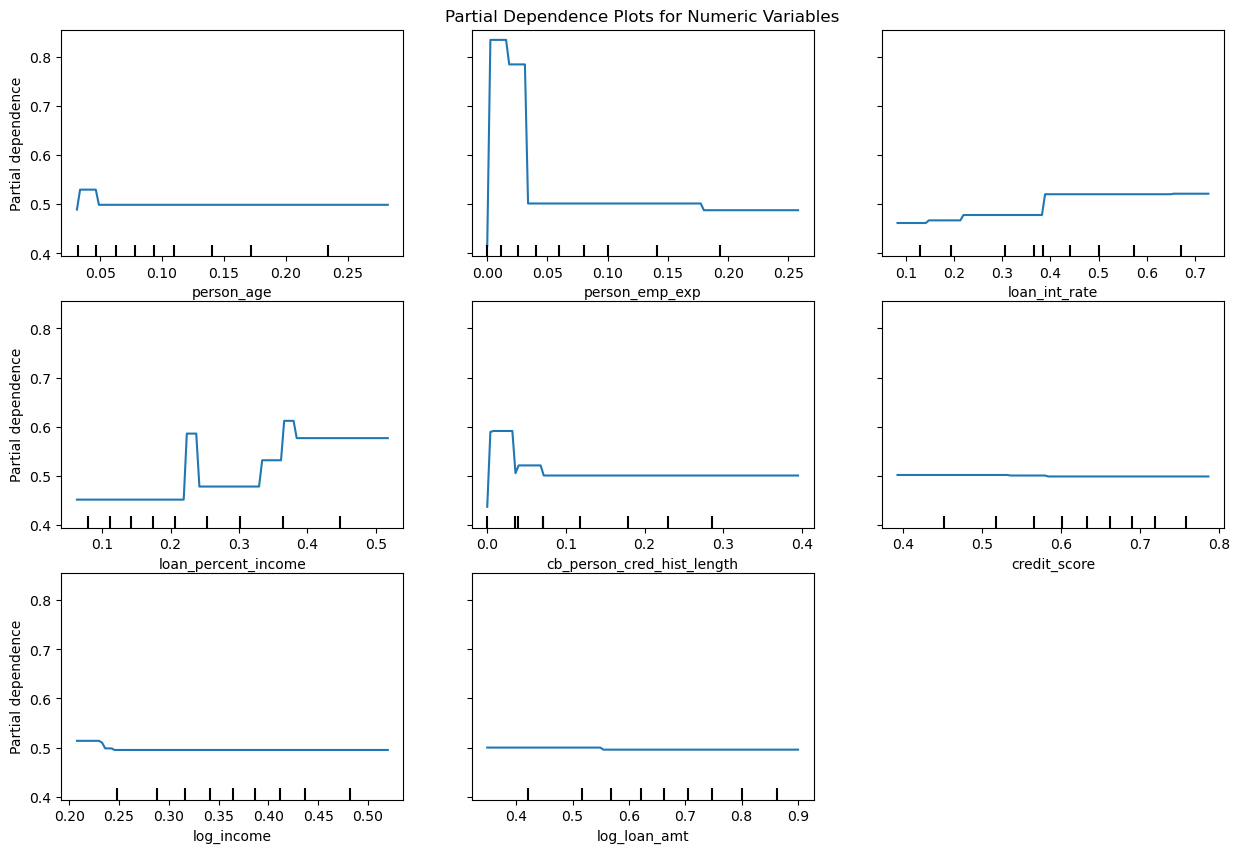

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots for Numeric Variables")
PartialDependenceDisplay.from_estimator(
    estimator=dt_best_model_smote,
    features= (0,1,2,3,4,5,6,7),
    feature_names=X.columns,
    X=X_smote_train,
    random_state=5,
    ax=ax,
)
plt.show()

The Partial Dependence Plots (PDPs) reveal that most numeric features in the model have only a limited effect on the predicted outcome. Person employment experience (person_emp_exp) and loan percent income (loan_percent_income) show some noticeable influence: low employment experience tends to slightly increase the predicted risk, and higher loan-to-income ratios also correlate with higher risk. Loan interest rate (loan_int_rate) has a mild positive impact, where higher rates slightly increase risk predictions. On the other hand, features such as person age, credit score, income (log_income), loan amount (log_loan_amt), and credit history length (cb_person_cred_hist_length) show almost flat lines, suggesting they have very little independent effect on the model's decisions. Overall, while a few variables do show some influence, the model’s predictions seem relatively insensitive to most individual numeric features.

<h4> Binary Variables with Two Classes </h4>

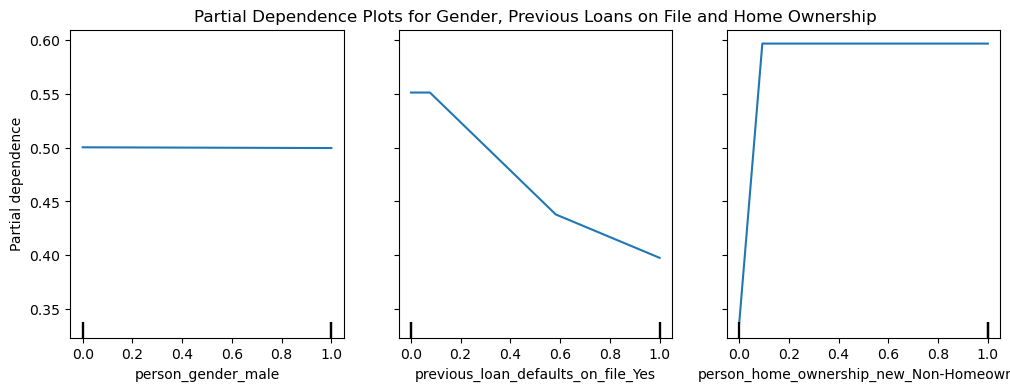

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title("Partial Dependence Plots for Gender, Previous Loans on File and Home Ownership")
PartialDependenceDisplay.from_estimator(
    estimator=dt_best_model_smote,
    features= (8,14, 18),
    feature_names=X.columns,
    X=X_smote_train,
    random_state=5,
    ax=ax,
)
plt.show()

These PDP plots show how three categorical features impact the model’s predictions. Gender (person_gender_male) has no visible effect — the flat line indicates that being male or female doesn't change the prediction. Previous loan defaults (previous_loan_defaults_on_file_Yes) show a clear negative trend: individuals with defaults are associated with a lower partial dependence, suggesting they are less likely to get a favorable prediction. Home ownership (person_home_ownership_new_Non-Homeowner) has a sharp effect — non-homeowners have much higher partial dependence, meaning the model predicts them very differently compared to homeowners.

<h4> Loan Intent </h4>

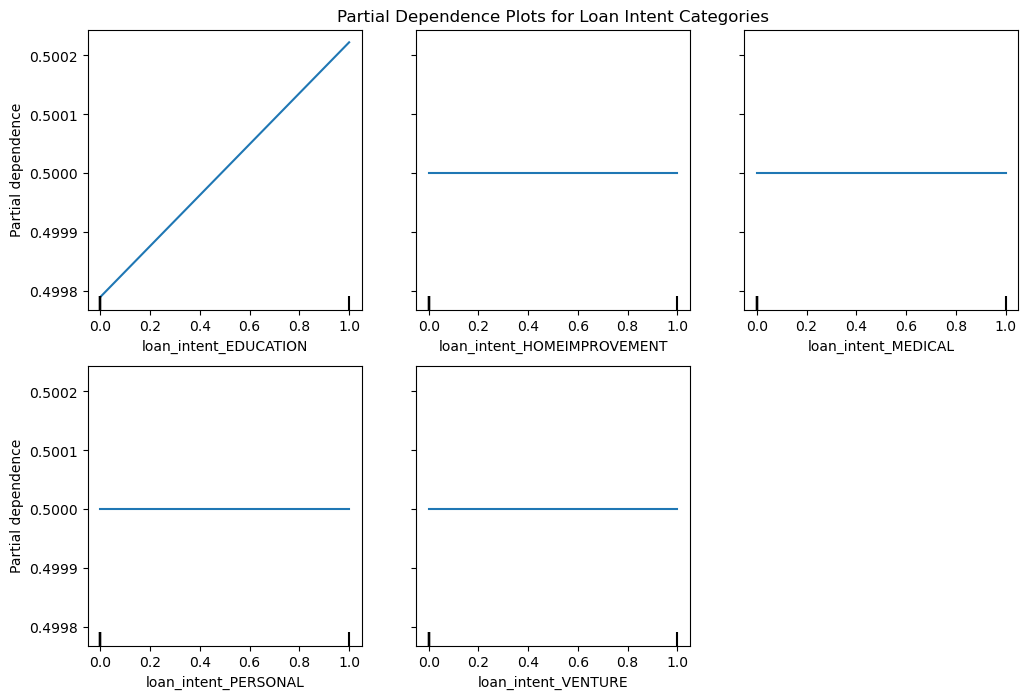

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Partial Dependence Plots for Loan Intent Categories")
PartialDependenceDisplay.from_estimator(
    estimator=dt_best_model_smote,
    features= (9,10,11,12,13),
    feature_names=X.columns,
    X=X_smote_train,
    random_state=5,
    ax=ax,
)
plt.show()

The above PDP plots show how that except for education, none of the other factors of loan_intent has any visible effect — the flat lines indicate no impact on the model prediction. However, loan_intent_EDUCATION show a clear positive trend: individuals who's intent for the loan is education are associated with higher partial dependence, suggesting they are more likely to get a favorable prediction.

<h4> Education </h4>

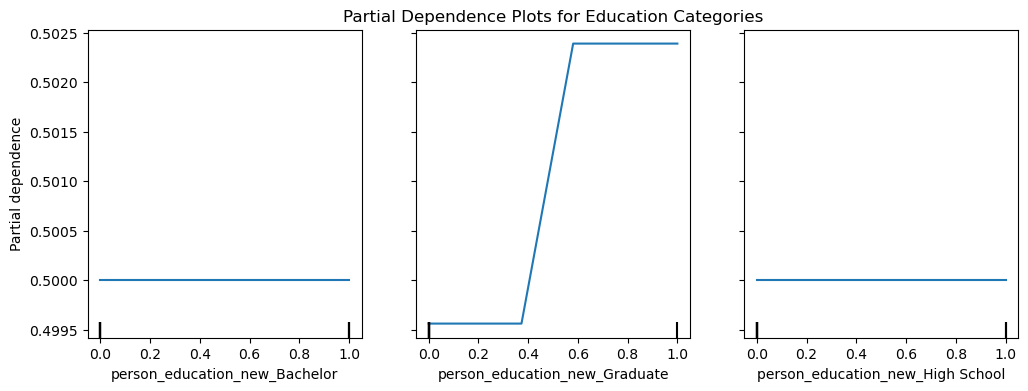

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Partial Dependence Plots for Education Categories")
PartialDependenceDisplay.from_estimator(
    estimator=dt_best_model_smote,
    features= (15,16,17),
    feature_names=X.columns,
    X=X_smote_train,
    random_state=5,
    ax=ax,
)
plt.show()

For individuals with a Bachelor’s degree or a High School education, the partial dependence remains flat at around 0.5, indicating that these categories have little to no influence on the model's predictions. In contrast, the Graduate category shows a slight increase in partial dependence when moving from 0 to 1, suggesting that having a Graduate degree slightly raises the probability of a positive prediction. Overall, only the Graduate education category appears to have a meaningful, though still small, impact on the model's output.